# Customers Segmentation based on their Credit Card Usage Behavior

## Introduction

Segmenting customers into different groups with distinct characteristics and user behavior is significantly important in marketing. These appropriate clustering results allow us to target each group with efficient strategies that can boost business profits and even increase customer satisfaction, leading to a decrease in customer churn rate.

I plan to utilize dimension reduction techniques, specifically Principal Component Analysis (PCA), and apply the K-Means clustering method to segment customers based on their past 6 months' credit card information. By examining each group, my aim as a data analyst is to devise potential and effective marketing strategies

## Data Dictionary

| Column Name                     | Description                                                                       |
|--------------------------------|-----------------------------------------------------------------------------------|
| CUST_ID                        | Identification of Credit Card holder (Categorical)                                |
| BALANCE                        | Balance amount left in their account to make purchases                            |
| BALANCE_FREQUENCY              | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                      | Amount of purchases made from account                                             |
| ONEOFF_PURCHASES               | Maximum purchase amount done in one-go                                            |
| INSTALLMENTS_PURCHASES        | Amount of purchase done in installment                                            |
| CASH_ADVANCE                   | Cash in advance given by the user                                                 |
| PURCHASES_FREQUENCY           | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY      | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY          | How frequently the cash in advance being paid                                    |
| CASHADVANCETRX                 | Number of Transactions made with "Cash in Advanced"                               |
| PURCHASES_TRX                 | Number of purchase transactions made                                              |
| CREDIT_LIMIT                   | Limit of Credit Card for user                                                     |
| PAYMENTS                       | Amount of Payment done by user                                                    |
| MINIMUM_PAYMENTS              | Minimum amount of payments made by user                                           |
| PRCFULLPAYMENT                 | Percent of full payment paid by user                                              |
| TENURE                         | Tenure of credit card service for user                                             |


### Library and Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('CC GENERAL.csv')

### Exploratory Data Analysis (EDA)

In [3]:
data.shape

(8950, 18)

In [4]:
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


One way to check for outliers in our data is to examine the minimum and maximum values for each column and compare them with the 25th and 75th percentiles. If there is a significant difference between these values, it suggests the presence of outliers. For instance, in the 'BALANCE' column, there is approximately a 120-unit difference between the minimum and 25th percentile values, but a 12,000-unit difference between the 75th percentile and maximum values. Let's visualize this by drawing a distribution plot.

<Axes: xlabel='BALANCE', ylabel='Density'>

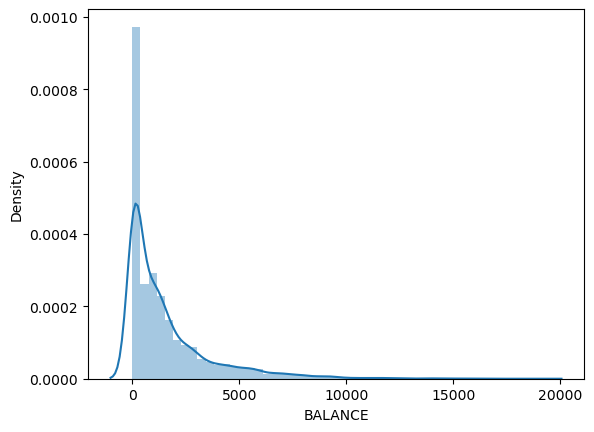

In [6]:
sns.distplot(data['BALANCE'])

Let's examine our columns for any missing values and then proceed to impute them with appropriate values

In [7]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

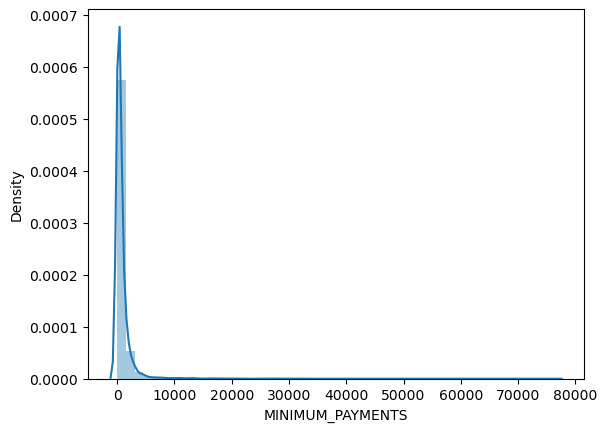

In [8]:
sns.distplot(data['MINIMUM_PAYMENTS'])

<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

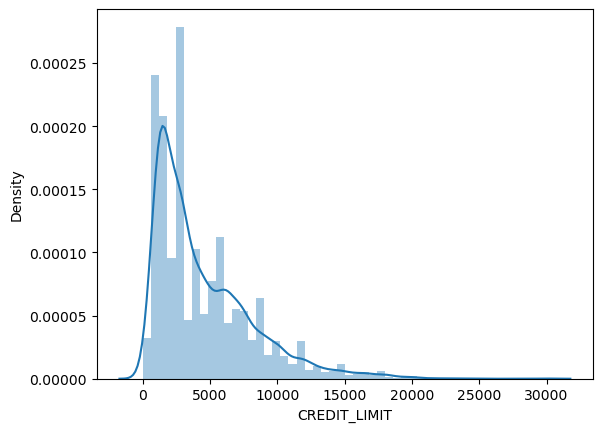

In [9]:
sns.distplot(data['CREDIT_LIMIT'])

Given that those two columns with missing values also have outliers, I have concluded that imputing with the median is a better choice than the mean value

In [10]:
data.loc[data['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[data['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = data['MINIMUM_PAYMENTS'].median()

In [11]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6])

### Scaling every columns considering outlier existance

First, only calling columns with money scale

In [13]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for i in columns:
    Range = i + '_RANGE'
    data[Range] = 0
    data.loc[((data[i]>0) & (data[i]<=500)), Range] = 1
    data.loc[((data[i]>500) & (data[i]<=1000)), Range] = 2
    data.loc[((data[i]>1000) & (data[i]<=3000)), Range] = 3
    data.loc[((data[i]>3000) & (data[i]<=5000)), Range] = 4
    data.loc[((data[i]>5000) & (data[i]<=10000)), Range] = 5
    data.loc[((data[i]>10000)),Range] = 6

In [14]:
data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,...,0.000000,12,1,1,0,1,0,2,1,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,...,0.222222,12,4,0,0,0,5,5,4,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,...,0.000000,12,3,2,2,0,0,5,2,2


Now, only calling columns with frequency scale

In [15]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for i in columns:
    
    Range = i + '_RANGE'
    data[Range] = 0
    data.loc[((data[i]>0) & (data[i]<=0.1)),Range] = 1
    data.loc[((data[i]>0.1) & (data[i]<=0.2)),Range] = 2
    data.loc[((data[i]>0.2) & (data[i]<=0.3)),Range] = 3
    data.loc[((data[i]>0.3) & (data[i]<=0.4)),Range] = 4
    data.loc[((data[i]>0.4) & (data[i]<=0.5)),Range] = 5
    data.loc[((data[i]>0.5) & (data[i]<=0.6)),Range] = 6
    data.loc[((data[i]>0.6) & (data[i]<=0.7)),Range] = 7
    data.loc[((data[i]>0.7) & (data[i]<=0.8)),Range] = 8
    data.loc[((data[i]>0.8) & (data[i]<=0.9)),Range] = 9
    data.loc[((data[i]>0.9) & (data[i]<=1.0)),Range] = 10

Lastly, only calling columns with count scale

In [16]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for i in columns:
    
    Range = i + '_RANGE'
    data[Range] = 0
    data.loc[((data[i]>0) & (data[i]<=5)), Range] = 1
    data.loc[((data[i]>5) & (data[i]<=10)), Range] = 2
    data.loc[((data[i]>10) & (data[i]<=15)), Range] = 3
    data.loc[((data[i]>15) & (data[i]<=20)), Range] = 4
    data.loc[((data[i]>20) & (data[i]<=30)), Range] = 5
    data.loc[((data[i]>30) & (data[i]<=50)), Range] = 6
    data.loc[((data[i]>50) & (data[i]<=100)), Range] = 7
    data.loc[((data[i]>100)),Range] = 8

Now, let's drop the original columns, keeping all the newly scaled columns

In [17]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

In [18]:
data.head(5)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


In [19]:
X= np.asarray(data)

In [20]:
scale = StandardScaler()
X = scale.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512628,-1.038243,-0.639517,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039308,1.293765,1.383342,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039308,-0.260907,0.371912,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039308,-1.815578,-0.639517,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.661983,-0.260907,-0.639517,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512628,-1.038243,-0.639517,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512628,-1.038243,-0.639517,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512628,-1.038243,-0.639517,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.363274,-1.038243,-0.639517,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978


After converting the original column values to categorical values initially, we still apply StandardScaler because we have tenure columns ranging from 6 to 12. We want to ensure that all columns have the same scale.

### Modeling

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
test = 30
inertia_list = []
silhouette_scores = []

for i in range(2, test + 1):
    kmean = KMeans(n_clusters=i)
    kmean.fit(X)
    inertia_list.append(kmean.inertia_)
    
    labels = kmean.labels_
    silhouette_scores.append(silhouette_score(X, labels))
silhouette_scores

[0.21396165902348724,
 0.197766182659726,
 0.20053584326755997,
 0.1827416386309092,
 0.15777759105396946,
 0.17789584979151232,
 0.16879835825716807,
 0.1809773419042249,
 0.18248523371533112,
 0.17121998414206963,
 0.16388317807046834,
 0.16193154999698436,
 0.15482639084756872,
 0.15644177272491705,
 0.1657356814892828,
 0.16644976942795836,
 0.161347176223499,
 0.145551186440887,
 0.1593421088722972,
 0.14787882991538306,
 0.15658754175027614,
 0.1581939082073983,
 0.15559142124250638,
 0.15532866879308493,
 0.14919643913981578,
 0.15478474154078087,
 0.15183958643554282,
 0.14547138036903293,
 0.14273259080732847]

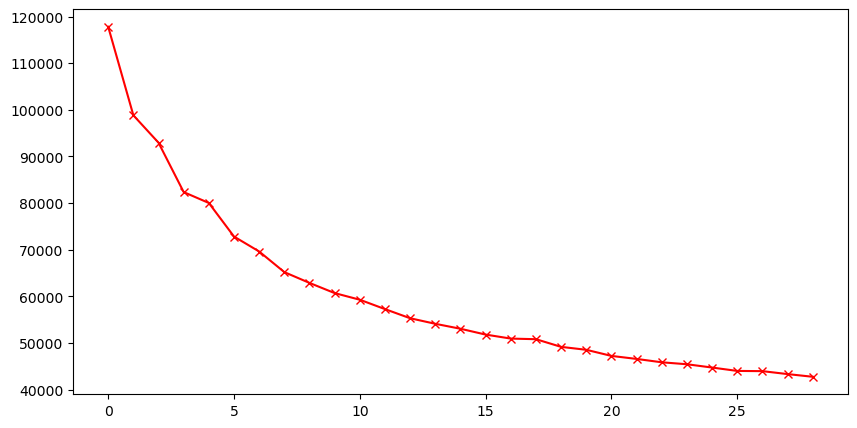

In [23]:
plt.figure(figsize=(10,5))
plt.plot(inertia_list, 'rx-')

After reviewing the inertia graph, it is observed that the inertia value stabilizes as k increases from 6 to 7, suggesting that k=6 might be the optimal number of clusters. Furthermore, the silhouette score for k=6 is comparatively high relative to other k values. Therefore, I conclude that the optimal k value for performing k-means clustering is 6

In [24]:
kmean= KMeans(n_clusters = 6)
kmean.fit(X)
labels=kmean.labels_
labels

array([1, 2, 1, ..., 5, 4, 1], dtype=int32)

In [25]:
clusters = pd.concat([data, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head(5)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,2
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,1


### Cluster Interpretation (k=6)

Now, by using a histogram for each column within each cluster, we can observe the trends for each cluster across the columns. This will aid in interpreting the characteristics of each cluster.

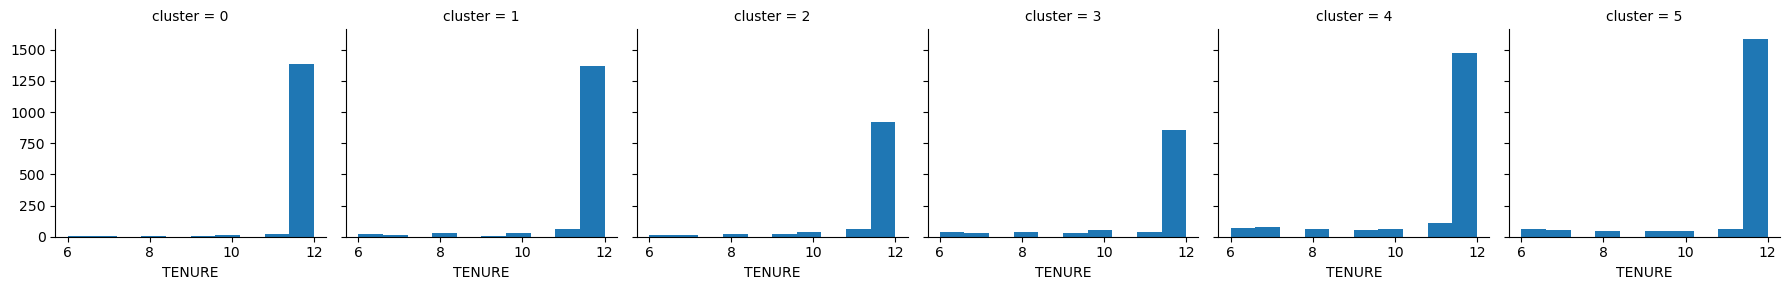

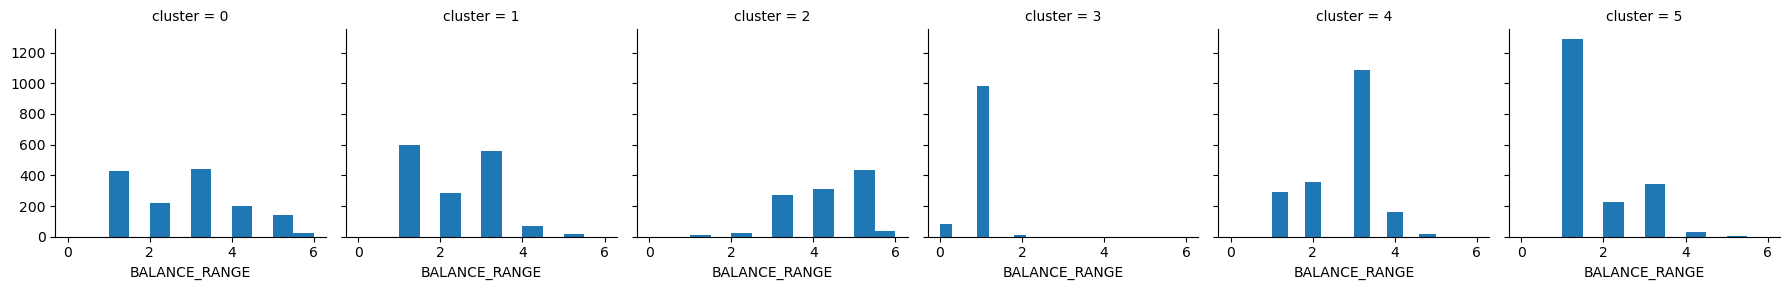

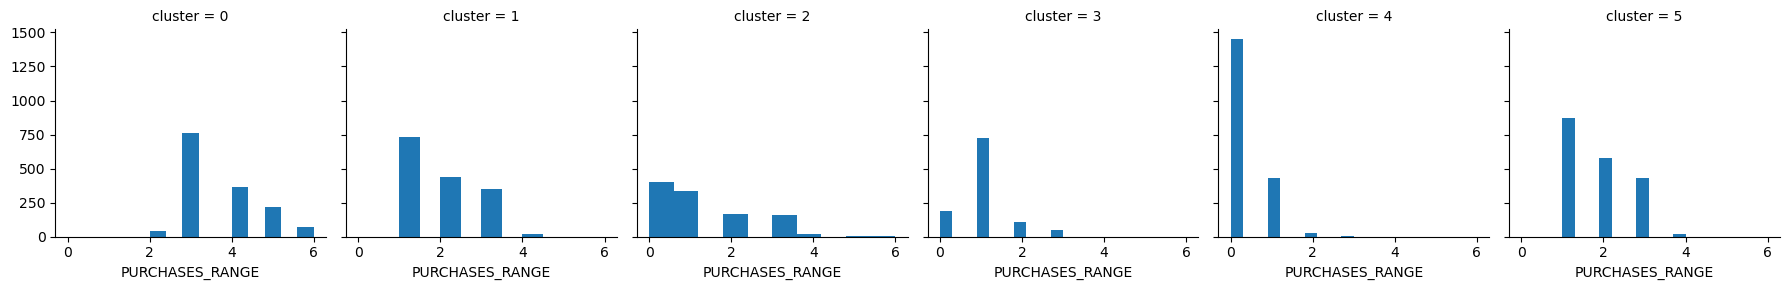

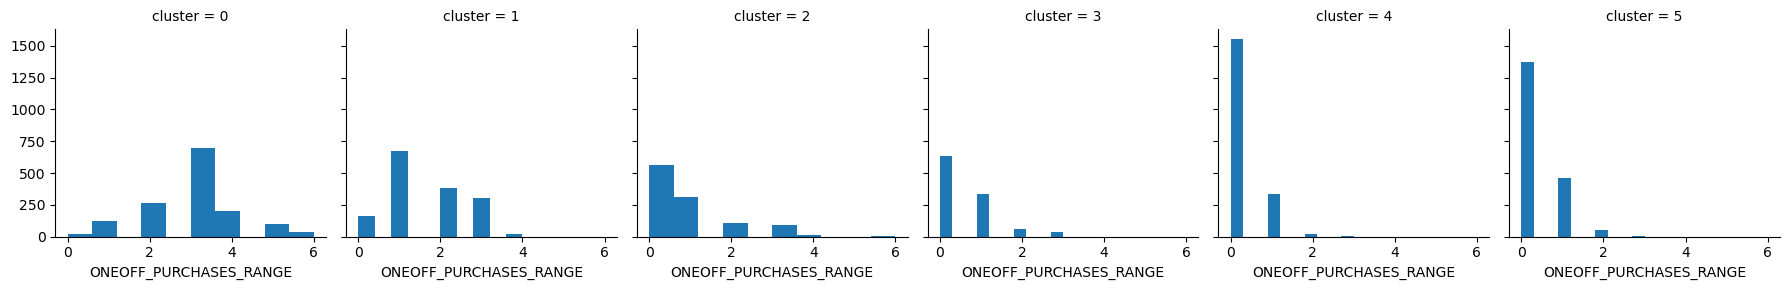

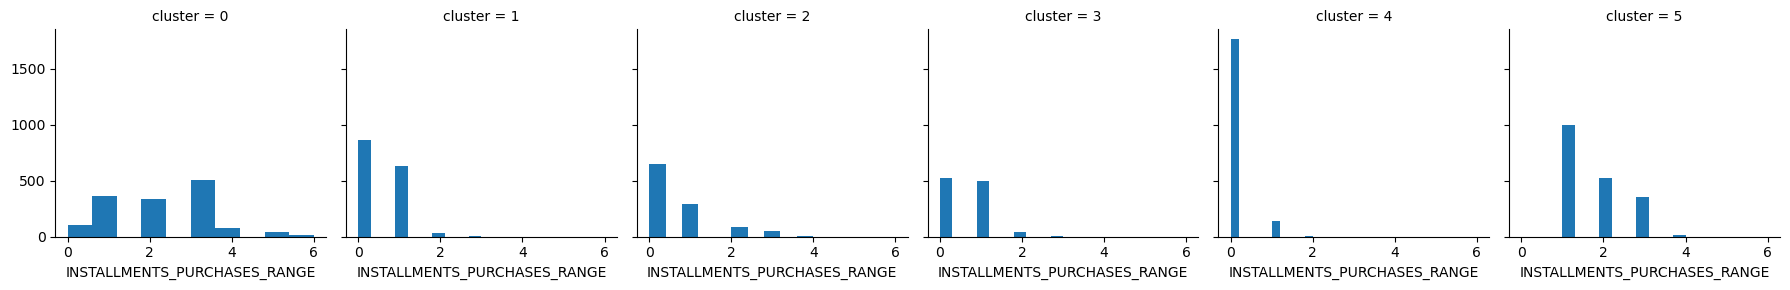

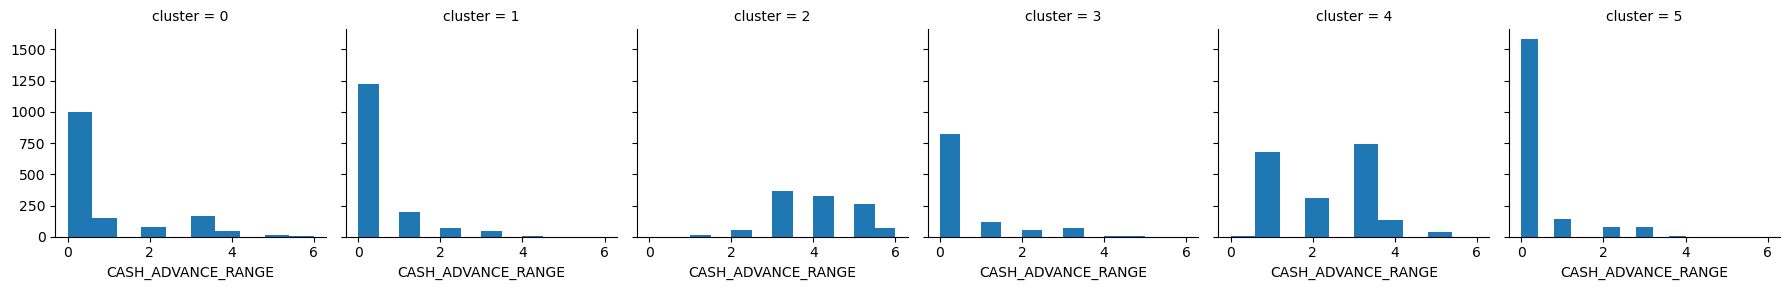

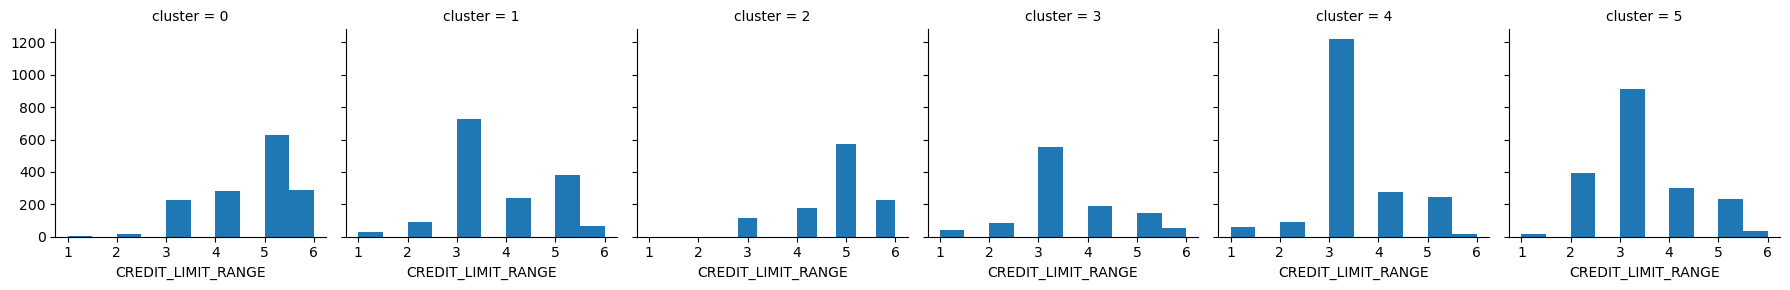

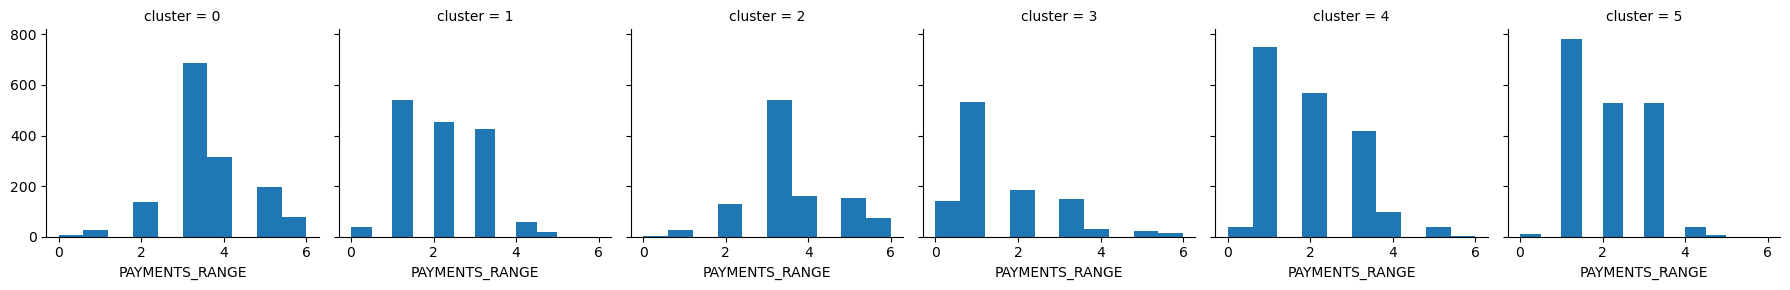

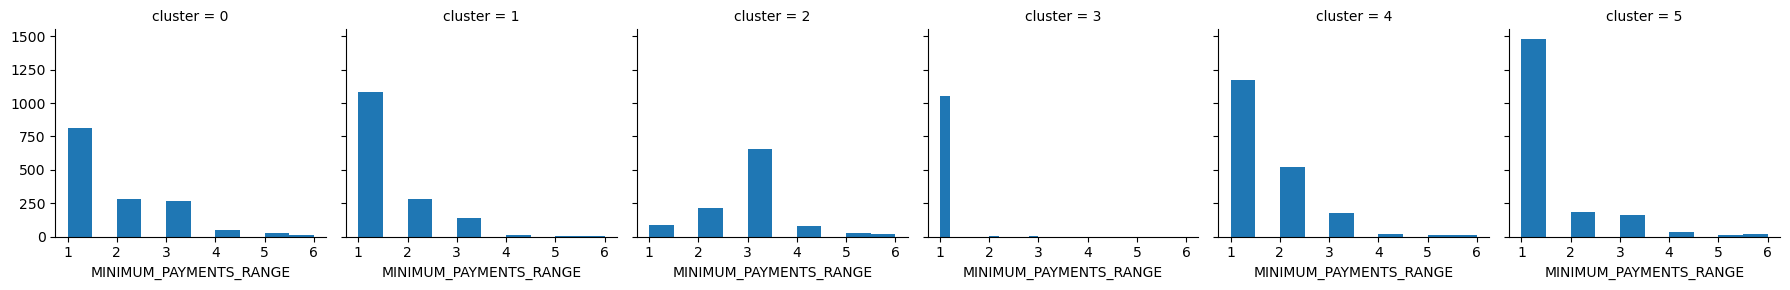

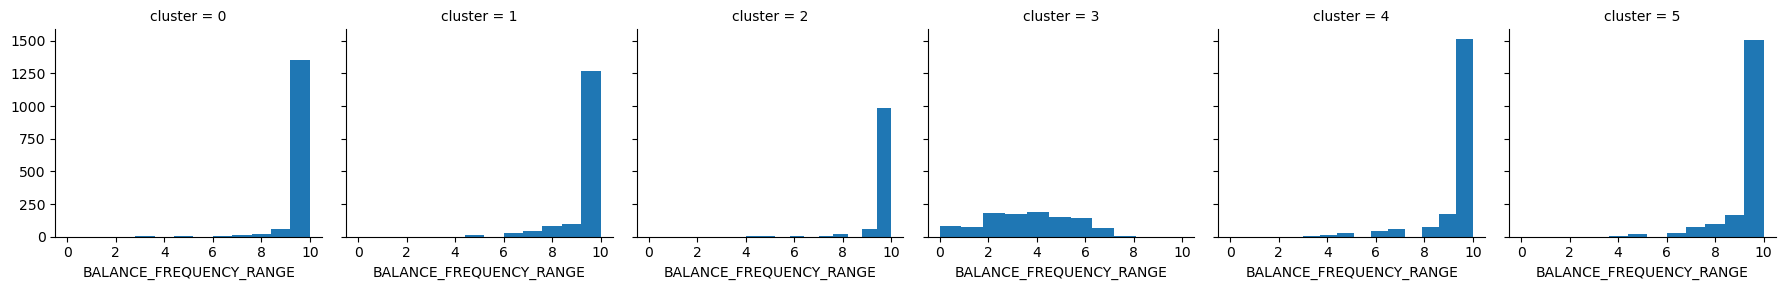

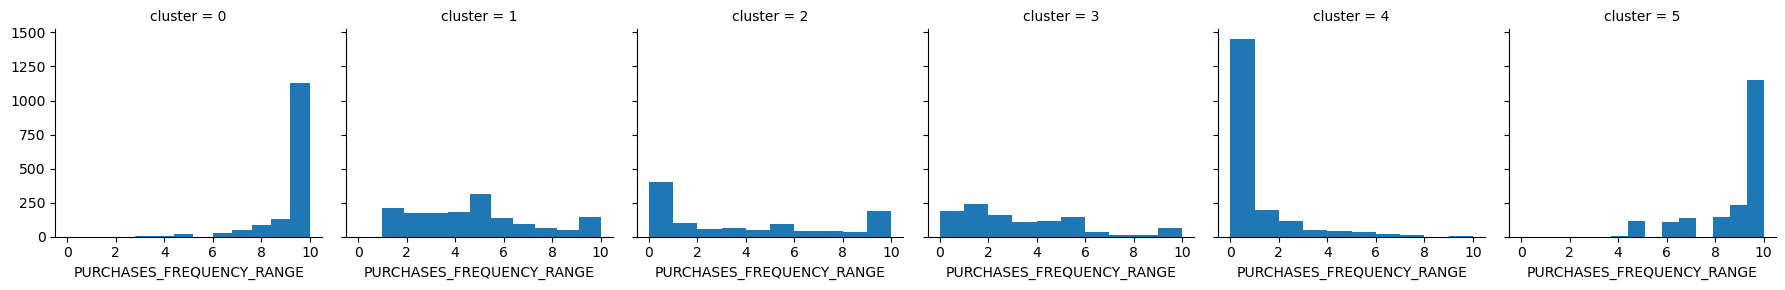

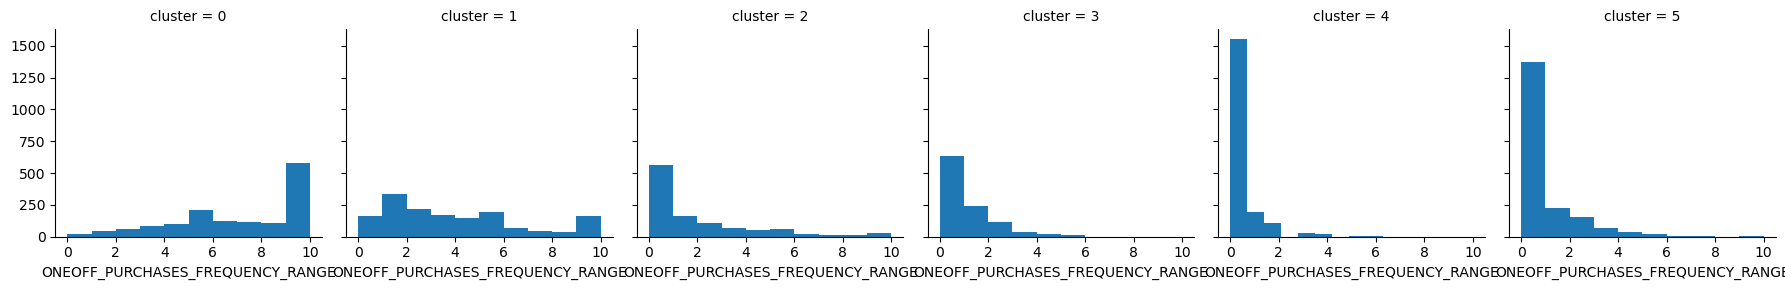

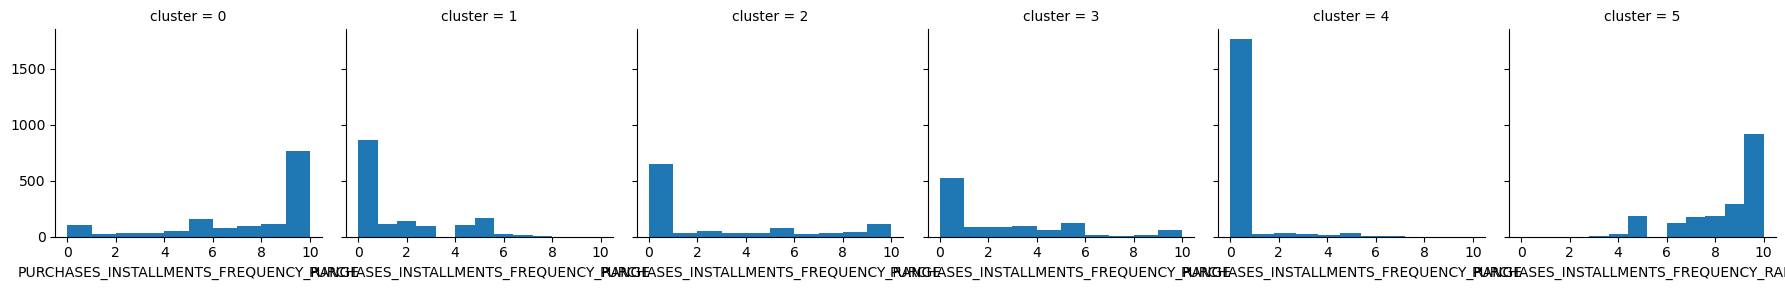

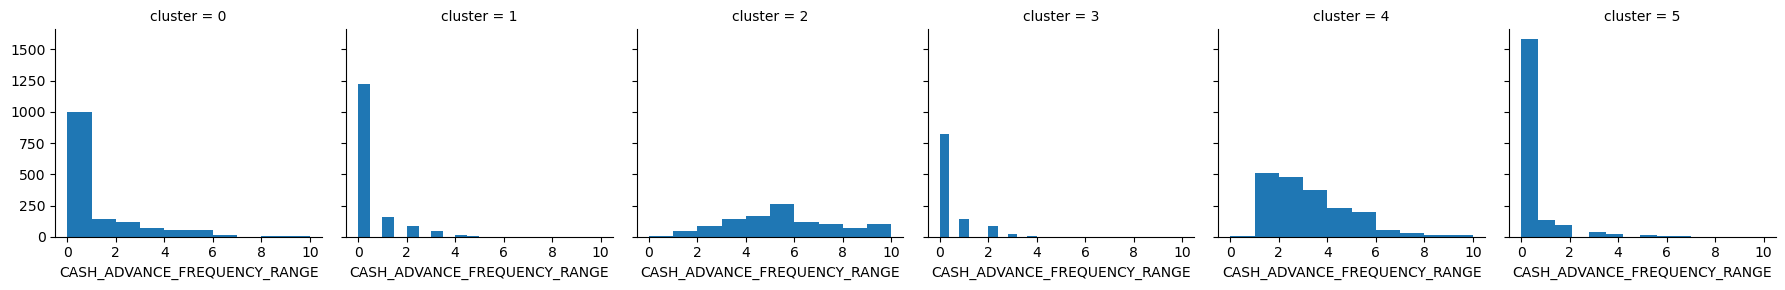

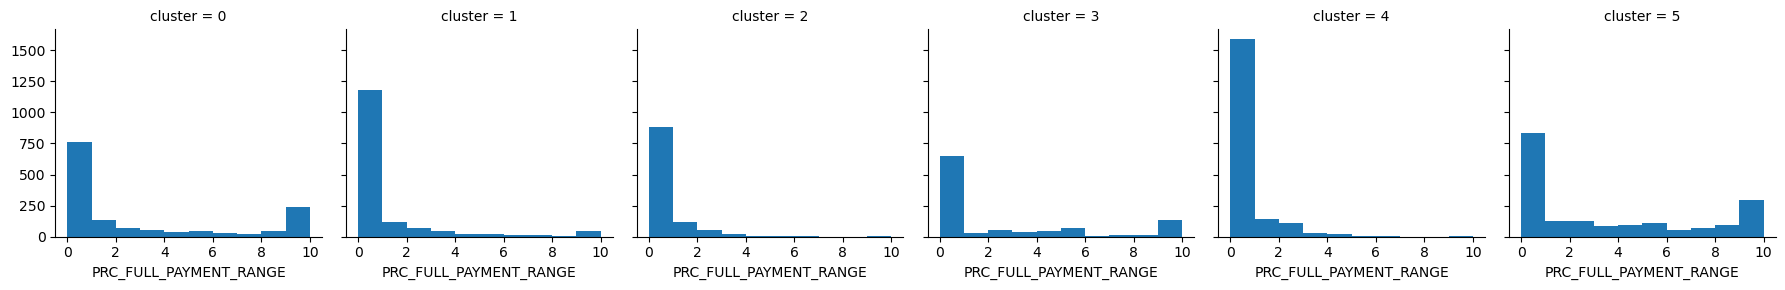

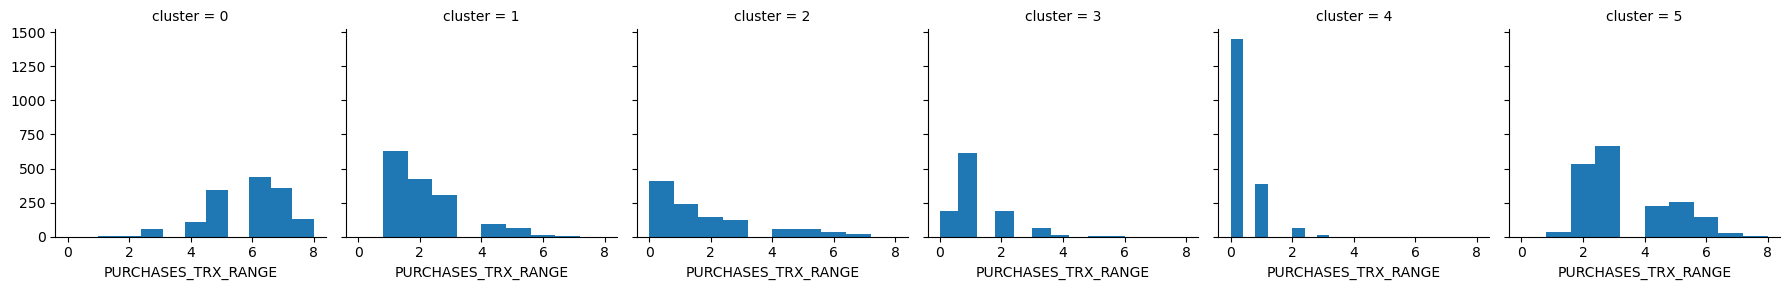

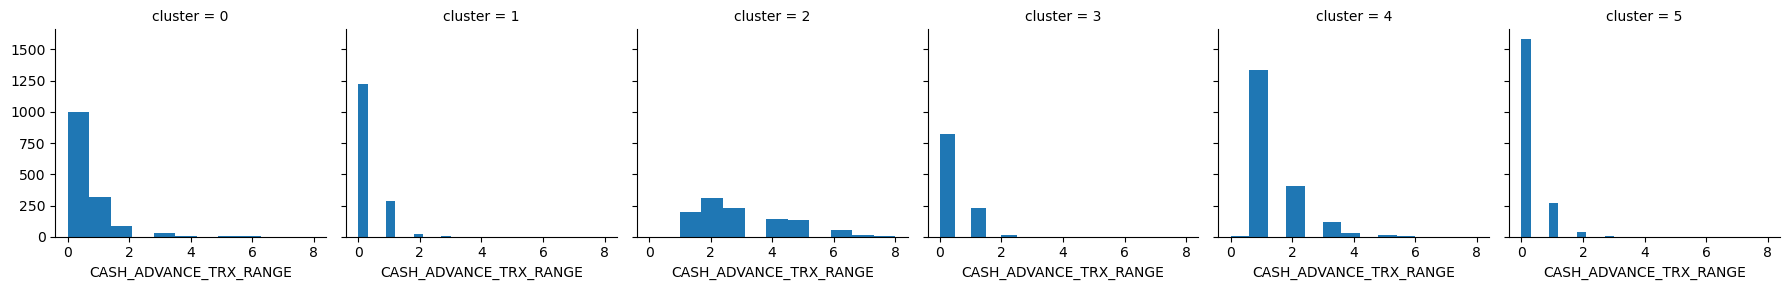

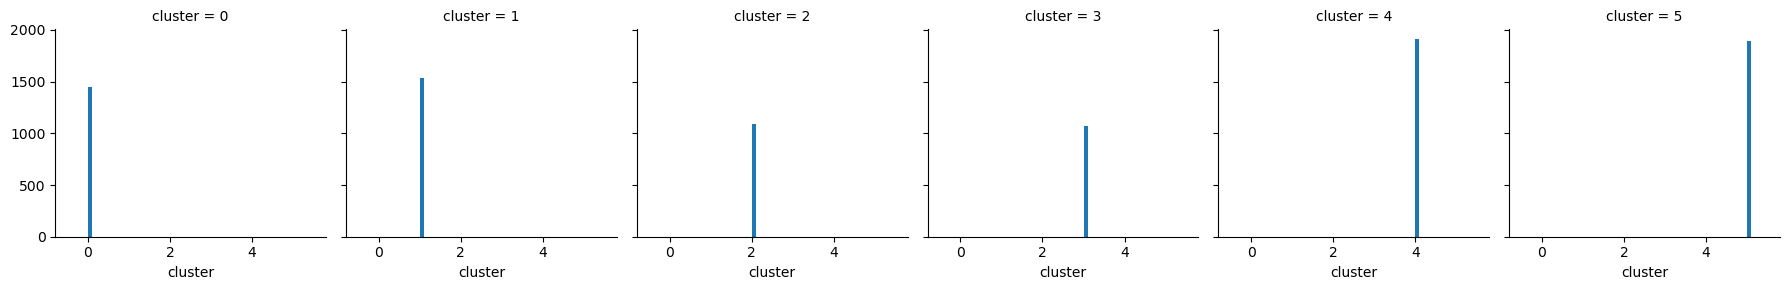

In [26]:
for i in clusters:
    grid = sns.FacetGrid(clusters, col = 'cluster')
    grid.map(plt.hist, i)

The cluster order changes when we run the above code since FacetGrid is being created inside the loop

### Cluster Analysis:

**Cluster 0: *Moderate Spenders with Credit Leverage***

**Cluster 1: *Conservative Credit Users with Limited Spending***

**Cluster 2: *Balanced Spenders with Varied Payment Behavior***

**Cluster 3: *Active and Balanced Spenders with Prudent Credit Management***

**Cluster 4: *Novice Credit Users with Limited Engagement***

**Cluster 5: *Long-Term Credit Veterans with Conservative Spending Habits***

### Visualize Clusters (k=6)

It has 6 clusters with numerous columns, which is difficult to visualize in 2-dimensional frame. Now, we want to use PCA technique to help us visualize the clusters.

In [27]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

In [28]:
pd.DataFrame(X_PCA)

,0,1
0,-14.362449,-33.177933
1,-34.078246,22.745663
2,17.893138,11.254679
3,-10.925754,-1.317323
4,-22.083753,-22.511191
...,...,...
8945,10.704580,-17.460054
8946,8.038385,-16.404629
8947,5.186867,-19.206886
8948,-21.763611,-16.105562


In [29]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Moderate Spenders with Credit Leverage', 
         1: 'Conservative Credit Users with Limited Spending', 
         2: 'Balanced Spenders with Varied Payment Behavior', 
         3: 'Active and Balanced Spenders with Prudent Credit Management', 
         4: 'Novice Credit Users with Limited Engagement',
         5: 'Long-Term Credit Veterans with Conservative Spending Habits'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
df

,x,y,label
0,-14.362449,-33.177933,1
1,-34.078246,22.745663,2
2,17.893138,11.254679,1
3,-10.925754,-1.317323,1
4,-22.083753,-22.511191,1
...,...,...,...
8945,10.704580,-17.460054,5
8946,8.038385,-16.404629,5
8947,5.186867,-19.206886,5
8948,-21.763611,-16.105562,4


In [30]:
groups = df.groupby('label')

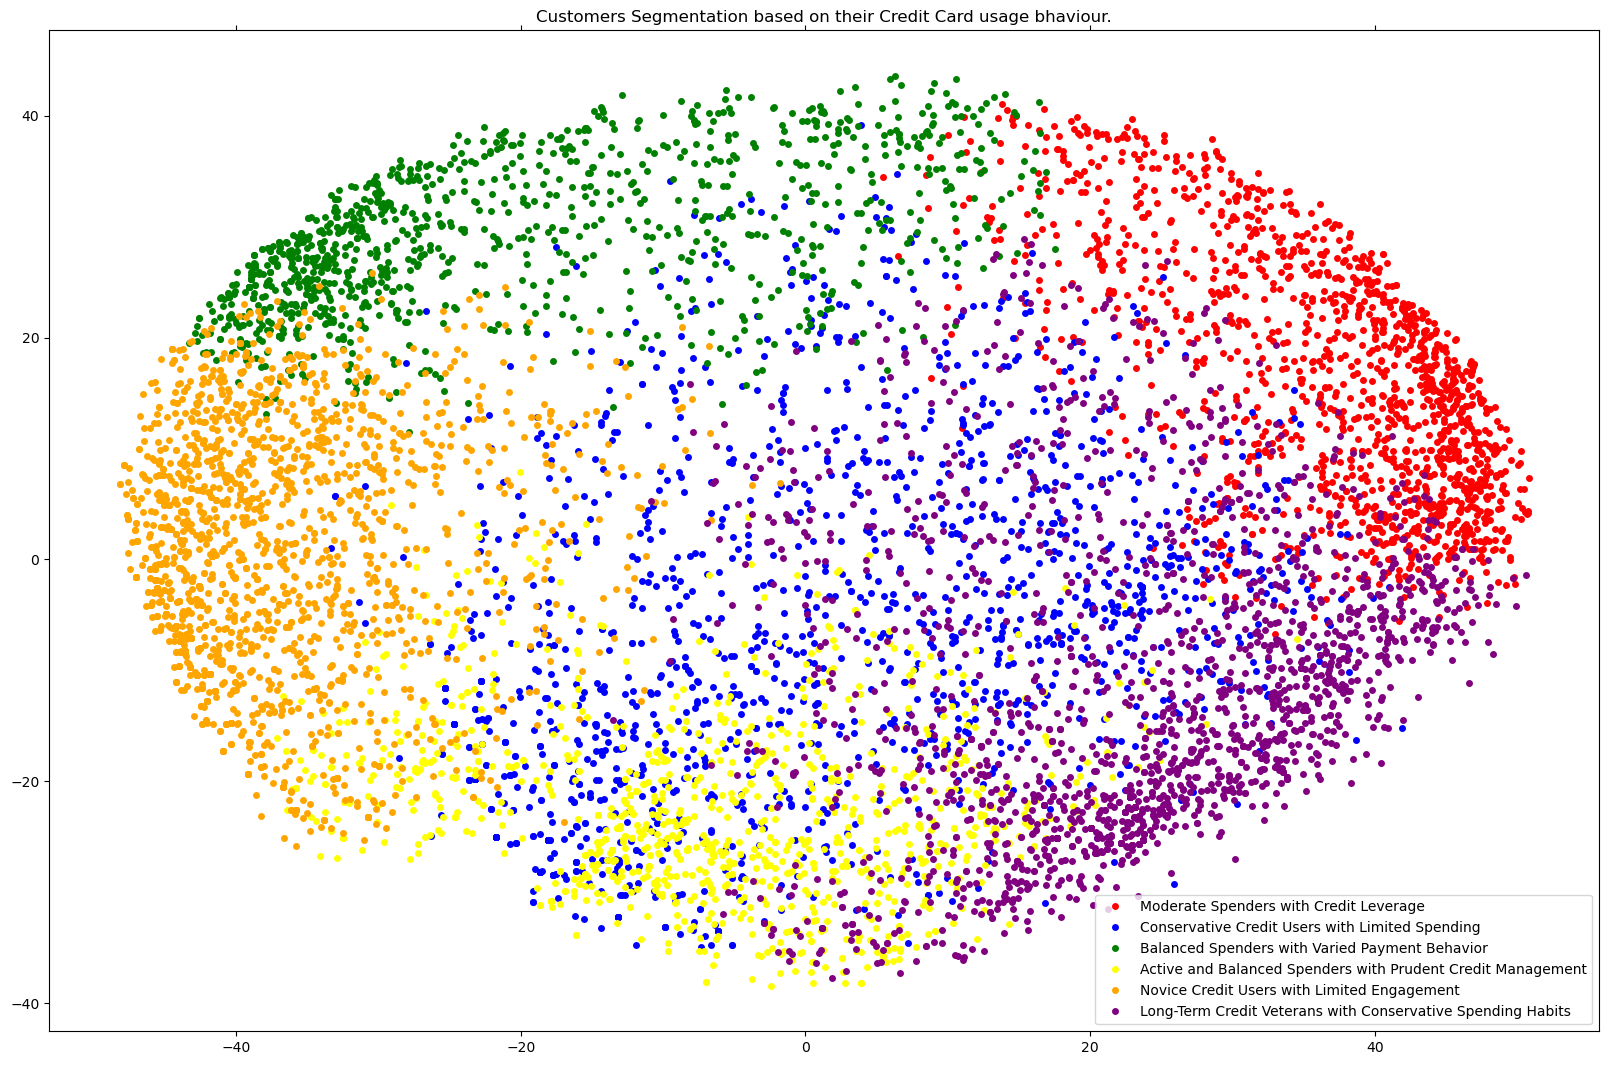

In [31]:
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

We can see that our data is clustered well with 6 groups.